# CODE PROJECT AKHIR MODEL LINEAR KELOMPOK 3

Anggota Kelompok =


1.   Haikal Fikri Rabani (2206823713)
2.   Luthfi Athallah Herdita Wiryaman (2206826980)
3.   Mohammad Raffy Zeidan (2206051462)
4.   Rahman Insani (2206042041)
5.   Zavier Raiyan Dana (2206829875)









# DISCLAIMER

Google colab kami menggunakan syntax R dalam pelaksanaan nya. Jika codingan ini di run, maka google colab akan memakan waktu yang cukup lama untuk meng-install package nya
(bisa lebih dari 10 menit)

Tapi untuk running code selanjutnya tidak akan membutuhkan waktu lama untuk menghasilkan output, terima kasih :)

~ Kelompok

In [ ]:
install.packages("readr")
install.packages("dplyr")
install.packages("outliers")
install.packages("yardstick")
install.packages("olsrr")
install.packages("caret")
install.packages("car")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘hardhat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘goftest’, ‘gridExtra’, ‘nortest’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics

# 1. IMPORT LIBRARY DAN DATASET



In [ ]:
# Upload package yang diperlukan
library(readr)
library(dplyr)
library(yardstick)
library(outliers)
library(olsrr)
library(caret)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [ ]:
# Import dataset ke Colab
data <- read_csv("https://raw.githubusercontent.com/Fyodorrrr/E-Commerce/main/Ecommerce%20Customers.csv")
data

Rows: 500 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Email, Address, Avatar
dbl (5): Avg. Session Length, Time on App, Time on Website, Length of Member...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.082621,587.9511
hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.664034,392.2049
pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.00091,11.33028,37.11060,4.104543,487.5475
riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.120179,581.8523
mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.33067,12.79519,37.53665,4.446308,599.4061
alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.87104,12.02693,34.47688,5.493507,637.1024
katherine20@yahoo.com,"68388 Reyes Lights Suite 692 Josephbury, WV 92213-0247",DarkSlateBlue,32.02160,11.36635,36.68378,4.685017,521.5722
awatkins@yahoo.com,Unit 6538 Box 8980 DPO AP 09026-4941,Aqua,32.73914,12.35196,37.37336,4.434273,549.9041
vchurch@walter-martinez.com,"860 Lee Key West Debra, SD 97450-0495",Salmon,33.98777,13.38624,37.53450,3.273434,570.2004


# 2. PRE PROCESSING DATA

## Drop Kolom

In [ ]:
# Ambil kolom yang ingin digunakan dalam permasalahan
data$Email = NULL
data$Address = NULL
data$Avatar = NULL
data$`Avg. Session Length` = NULL

colnames(data) = c("App", "Website", "Membership", "Spent")
head(data)

App,Website,Membership,Spent
<dbl>,<dbl>,<dbl>,<dbl>
12.65565,39.57767,4.082621,587.9511
11.10946,37.26896,2.664034,392.2049
11.33028,37.11060,4.104543,487.5475
13.71751,36.72128,3.120179,581.8523
12.79519,37.53665,4.446308,599.4061
12.02693,34.47688,5.493507,637.1024


## Menghapus Outlier

In [ ]:
#Hapus outlier menggunakan metode kuantil
for (col in names(data)) {
  if (is.numeric(data[[col]])) {
    iqr <- IQR(data[[col]])
    upper_limit <- quantile(data[[col]], 0.75) + 1.5 * iqr
    lower_limit <- quantile(data[[col]], 0.25) - 1.5 * iqr

    # Mendeteksi outlier
    outlier <- which(data[[col]] > upper_limit | data[[col]] < lower_limit)

    # Menghapus outlier
    data <- data[-outlier, ]
  }
}

# 3. PEMODELAN

Sebelum membuat model, kelompok kami membagi data keseluruhan menjadi dua, yaitu `data_train` dan `data_test` dengan skala 80 : 20 (80% dataset dimasukan ke dalam data_train dan 20% dataset dimasukan ke dalam data_test). Hal ini bertujuan untuk mengukur kinerja model secara objektif, menghindari overfitting, dan mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya. Dengan membagi data, kita dapat melatih model pada satu subset dan menguji performanya pada subset lainnya, memberikan indikasi seberapa baik model tersebut dapat berkinerja pada data baru yang belum diketahui.

In [ ]:
# Split data menjadi dua, yaitu data train dan data test
index <- createDataPartition(data$Spent, p = 0.8, list = F)
data_train <- data[index, ]
data_test <- data[-index, ]

In [ ]:
head(data_train)
nrow(data_train)

App,Website,Membership,Spent
<dbl>,<dbl>,<dbl>,<dbl>
12.65565,39.57767,4.082621,587.9511
11.10946,37.26896,2.664034,392.2049
11.33028,37.11060,4.104543,487.5475
13.71751,36.72128,3.120179,581.8523
12.79519,37.53665,4.446308,599.4061
12.02693,34.47688,5.493507,637.1024


[1] 384

In [ ]:
head(data_test)
nrow(data_test)

App,Website,Membership,Spent
<dbl>,<dbl>,<dbl>,<dbl>
12.35196,37.37336,4.434273,549.9041
11.36549,37.60779,4.599937,534.7057
12.87798,37.44102,1.559152,419.9388
13.37856,38.73401,2.245148,436.5156
10.86916,35.62244,3.471413,447.6879
13.10451,38.87804,2.820097,491.0732


[1] 93

# 4. PENGOLAHAN DATA DAN ANALISIS HASIL

## Membuat semua kombinasi model yang bisa terbentuk

Kelompok kami membuat `model_train` untuk membuat complete model yang sudah mencakup interaksi. Selanjutnya, kami membuat semua kombinasi model yang bisa terbentuk dengan syntax `ols_step_all_possible(model_train)`. Dari hasil output di bawah, kita bisa membentuk total 63 model lengkap dari model tanpa interaksi, model dengan interaksi, dan complete model

In [ ]:
# Buat model linear lengkap orde 2 dari data train untuk mendapat model yang diajukan
model_train<- lm(Spent ~ App + Website + Membership + App:Website + App:Membership + Website:Membership, data = data)

In [ ]:
# Buat all possible regression model yang bisa terbentuk
ols_step_all_possible(model_train)

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,App:Membership,7.727755e-01,0.772297131,0.770947340,233.14205856,4692.316,3332.663,4704.819,518348.8,1091.2414,0.2291380,2.292584
3,2,1,Membership,5.738678e-01,0.572970652,0.570417688,851.28451323,4992.259,3632.599,5004.762,972100.8,2046.4920,0.4297207,4.299466
6,3,1,Website:Membership,5.717263e-01,0.570824698,0.568227093,857.93945009,4994.650,3634.990,5007.153,976985.9,2056.7762,0.4318802,4.321073
1,4,1,App,2.305025e-01,0.228882508,0.223643926,1918.35543623,5274.161,3914.497,5286.663,1755392.1,3695.4972,0.7759775,7.763855
4,5,1,App:Website,1.973607e-01,0.195670889,0.190202816,2021.34983844,5294.275,3934.611,5306.777,1830995.9,3854.6603,0.8093984,8.098240
2,6,1,Website,4.551186e-05,-0.002059655,-0.008570965,2634.54305190,5399.121,4039.457,5411.624,2281114.9,4802.2625,1.0083752,10.089053
8,7,2,App Membership,8.484686e-01,0.847829185,0.846673826,-0.08808863,4501.062,3139.420,4517.732,346407.2,730.7846,0.1534496,1.535343
10,8,2,App App:Membership,8.437449e-01,0.843085575,0.841858627,14.59161465,4515.704,3154.062,4532.374,357205.7,753.5653,0.1582330,1.583204
11,9,2,App Website:Membership,8.404044e-01,0.839730990,0.838490271,24.97280327,4525.794,3164.151,4542.464,364842.2,769.6754,0.1616158,1.617051


## Variable Selection dengan Stepwise Dua Arah

Pertama - tama, kelompok kami menggunakan metode stepwise dua arah untuk menentukan model yang bisa diajukan. Variabel di seleksi berdasarkan nilai p - value. Setelah itu, kami mendapatkan hasil model yang bisa diajukan.

In [ ]:
# Lakukan metode stepwise dua arah untuk menemukan variabel yang terbaik
ols_step_both_p(model_train, penter = 0.05, details = T)

Stepwise Selection Method   
---------------------------

Candidate Terms: 

1. App 
2. Website 
3. Membership 
4. App:Website 
5. App:Membership 
6. Website:Membership 

We are selecting variables based on p value...


Stepwise Selection: Step 1 

- App:Membership added 

                         Model Summary                           
----------------------------------------------------------------
R                       0.879       RMSE                 32.965 
R-Squared               0.773       Coef. Var             6.586 
Adj. R-Squared          0.772       MSE                1086.685 
Pred R-Squared          0.771       MAE                  26.418 
----------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                  ANOVA                                    
--------------------------------------------------------------------------
                   Sum of          


                                  Stepwise Selection Summary                                   
----------------------------------------------------------------------------------------------
                           Added/                   Adj.                                          
Step       Variable       Removed     R-Square    R-Square      C(p)         AIC        RMSE      
----------------------------------------------------------------------------------------------
   1    App:Membership    addition       0.773       0.772    233.1420    4692.3163    32.9649    
   2         App          addition       0.844       0.843     14.5920    4515.7044    27.3652    
   3       Website        addition       0.844       0.843     16.5910    4517.7042    27.3941    
   4         App          removal        0.773       0.772    233.8920    4693.4709    32.9704    
   5      Membership      addition       0.830       0.829     57.8790    4556.6289    28.5350    
   6    App:Membersh

## Variable selection dengan Stepwise Backward

Selanjutnya, kami menggunakan metode stepwise backward untuk membuat model ke-2 yang bisa diajukan dan kami mendapat hasil model kami yang akan diajukan. Variabel akan di seleksi berdasarkan nilai p - value

In [ ]:
# Lakukan stepwise backward untuk menemukan model terbaik
ols_step_backward_p(model_train, penter = 0.05, details = T)

Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . App 
2 . Website 
3 . Membership 
4 . App:Website 
5 . App:Membership 
6 . Website:Membership 

We are eliminating variables based on p value...

- App:Website 

Backward Elimination: Step 1 

 Variable App:Website Removed 

                         Model Summary                          
---------------------------------------------------------------
R                       0.921       RMSE                27.008 
R-Squared               0.849       Coef. Var            5.396 
Adj. R-Squared          0.847       MSE                729.428 
Pred R-Squared          0.845       MAE                 21.846 
---------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                  ANOVA                                   
-------------------------------------------------------------------------
            



                                 Elimination Summary                                  
-------------------------------------------------------------------------------------
        Variable                            Adj.                                         
Step         Removed          R-Square    R-Square     C(p)         AIC        RMSE      
-------------------------------------------------------------------------------------
   1    App:Website             0.8488      0.8472     5.0000    4506.1374    27.0079    
   2    Website                 0.8485      0.8472     3.7906    4504.9391    27.0020    
   3    Website:Membership      0.8485      0.8475     1.8151    4502.9639    26.9741    
   4    App:Membership          0.8485      0.8478    -0.0881    4501.0620    26.9484    
-------------------------------------------------------------------------------------

## Variable Selection dengan Stepwise Forward

Selanjutnya, kami menggunakan metode stepwise forward untuk membuat model ke-2 yang bisa diajukan dan kami mendapat hasil model kami yang akan diajukan. Variabel akan di seleksi berdasarkan nilai p - value

In [ ]:
# Lakukan stepwise forward untuk menemukan model terbaik
ols_step_forward_p(model_train, penter = 0.05, details = T)

Forward Selection Method    
---------------------------

Candidate Terms: 

1. App 
2. Website 
3. Membership 
4. App:Website 
5. App:Membership 
6. Website:Membership 

We are selecting variables based on p value...


Forward Selection: Step 1 

- App:Membership 

                         Model Summary                           
----------------------------------------------------------------
R                       0.879       RMSE                 32.965 
R-Squared               0.773       Coef. Var             6.586 
Adj. R-Squared          0.772       MSE                1086.685 
Pred R-Squared          0.771       MAE                  26.418 
----------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                  ANOVA                                    
--------------------------------------------------------------------------
                   Sum of                 


                                  Selection Summary                                    
--------------------------------------------------------------------------------------
        Variable                            Adj.                                          
Step         Entered          R-Square    R-Square      C(p)         AIC        RMSE      
--------------------------------------------------------------------------------------
   1    App:Membership          0.7728      0.7723    233.1421    4692.3163    32.9649    
   2    App                     0.8437      0.8431     14.5916    4515.7044    27.3652    
   3    Website                 0.8437      0.8428     16.5914    4517.7042    27.3941    
   4    Website:Membership      0.8473      0.8460      7.4134    4508.5956    27.1057    
--------------------------------------------------------------------------------------

## Mencari Model Terbaik

Kelompok kami mendapat hasil yang beragam untuk setiap model. Dengan begitu, kita akan mencoba untuk membandingkan keempat model untuk menentukan model apa yang diajukan.

In [ ]:
# Cek Summary dari keempat model

cat("\nSummary dari Model Stepwise Dua Arah:\n")
stepwise_both <- lm(Spent ~ Website + Membership + Website:App, data = data_train)
summary(stepwise_both)
cat("\n", strrep("-", 40), "\n")

cat("\nSummary dari Model Stepwise Backward:\n")
stepwise_backward <- lm(Spent ~ App + Membership, data = data_train)
summary(stepwise_backward)
cat("\n", strrep("-", 40), "\n")


cat("\nSummary dari Model Stepwise Forward:\n")
stepwise_forward <- lm(Spent ~ App + Website + App:Membership + Membership:Website, data = data_train)
summary(stepwise_forward)
cat("\n", strrep("-", 40), "\n")

cat("\nSummary dari Model Complete:\n")
summary(model_train)


Summary dari Model Stepwise Dua Arah:



Call:
lm(formula = Spent ~ Website + Membership + Website:App, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.050 -18.909   0.925  18.379  70.402 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 277.88404   51.07760   5.440 9.54e-08 ***
Website     -12.44004    1.46588  -8.486 4.83e-16 ***
Membership   62.17473    1.55358  40.020  < 2e-16 ***
Website:App   1.03549    0.03949  26.224  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.81 on 380 degrees of freedom
Multiple R-squared:  0.8543,	Adjusted R-squared:  0.8531 
F-statistic: 742.7 on 3 and 380 DF,  p-value: < 2.2e-16



 ---------------------------------------- 

Summary dari Model Stepwise Backward:



Call:
lm(formula = Spent ~ App + Membership, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.351 -19.283   0.694  18.201  70.719 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -184.598     18.709  -9.867   <2e-16 ***
App           38.501      1.462  26.337   <2e-16 ***
Membership    62.170      1.548  40.171   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.74 on 381 degrees of freedom
Multiple R-squared:  0.8546,	Adjusted R-squared:  0.8538 
F-statistic:  1120 on 2 and 381 DF,  p-value: < 2.2e-16



 ---------------------------------------- 

Summary dari Model Stepwise Forward:



Call:
lm(formula = Spent ~ App + Website + App:Membership + Membership:Website, 
    data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.376 -19.345   0.706  18.339  71.067 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         32.8994    52.8325   0.623   0.5338    
App                 38.1286     5.7992   6.575 1.62e-10 ***
Website             -5.7404     2.2898  -2.507   0.0126 *  
App:Membership       0.1056     1.5827   0.067   0.9469    
Website:Membership   1.6418     0.5195   3.160   0.0017 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.9 on 379 degrees of freedom
Multiple R-squared:  0.8536,	Adjusted R-squared:  0.8521 
F-statistic: 552.6 on 4 and 379 DF,  p-value: < 2.2e-16



 ---------------------------------------- 

Summary dari Model Complete:



Call:
lm(formula = Spent ~ App + Website + Membership + App:Website + 
    App:Membership + Website:Membership, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.414 -18.609   0.872  18.705  76.456 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -3.599e+02  6.294e+02  -0.572   0.5677  
App                 3.910e+01  4.911e+01   0.796   0.4264  
Website             4.619e+00  1.690e+01   0.273   0.7847  
Membership          1.123e+02  5.352e+01   2.098   0.0365 *
App:Website        -8.968e-04  1.313e+00  -0.001   0.9995  
App:Membership     -3.013e-01  1.434e+00  -0.210   0.8337  
Website:Membership -1.275e+00  1.417e+00  -0.900   0.3688  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.04 on 470 degrees of freedom
Multiple R-squared:  0.8488,	Adjusted R-squared:  0.8468 
F-statistic: 439.6 on 6 and 470 DF,  p-value: < 2.2e-16


In [ ]:
# Mengecek MSE dari setiap model

model_both <- lm(Spent ~ Website + Membership + Website:App , data = data_train)
summary_both <-summary(model_both)
mse_value_both <- summary_both$sigma^2
cat("Mean Squared Error (MSE) dua arah:", mse_value_both, "\n")



model_backward <- lm(Spent ~ App + Membership, data = data_train)
summary_backward <-summary(model_backward)
mse_value_backward <- summary_backward$sigma^2
cat("Mean Squared Error (MSE) backward:", mse_value_backward, "\n")

model_forward <- lm(Spent ~ App + Website + App:Membership + Website:Membership, data = data_train)
summary_forward <- summary(model_forward)
mse_value_forward <- summary_forward$sigma^2
cat("Mean Squared Error (MSE) forward:", mse_value_forward, "\n")

summary_complete <- summary(model_train)
mse_value_complete <- summary_complete$sigma^2
cat("Mean Squared Error (MSE) complete :", mse_value_complete, "\n")

Mean Squared Error (MSE) dua arah: 718.6286 
Mean Squared Error (MSE) backward: 715.2878 
Mean Squared Error (MSE) forward: 723.7785 
Mean Squared Error (MSE) complete : 730.9795 


Cp Model Dua Arah : 2.4376
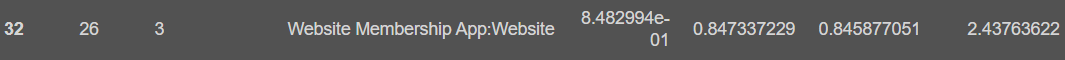

Cp Model Backward : -0.8808
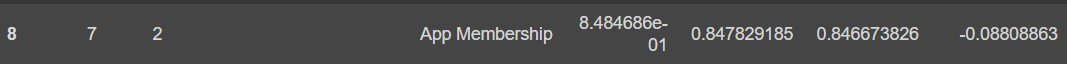

Cp Model Forward : 7.413
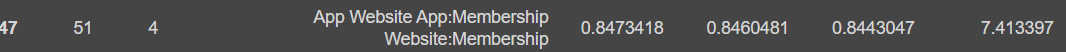

Cp Model Complete : 7
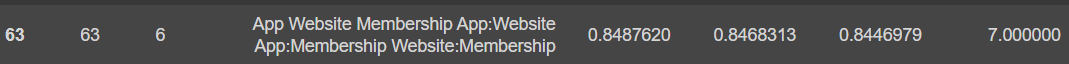

In [ ]:
# Mengecek nilai VIF, PRESS, dan TOLERANCE dari setiap model

cat("VIF dari model dua arah:\n")
vif_both <- vif(model_both)
print(vif_both)
cat("\n", strrep("-", 40), "\n")
cat("VIF dari model backward:\n")
vif_backward <- vif(model_backward)
print(vif_backward)
cat("\n", strrep("-", 40), "\n")
cat("VIF dari model forward:\n")
vif_forward <- vif(model_forward)
print(vif_forward)
cat("\n", strrep("-", 40), "\n")
cat("VIF dari model complete:\n")
vif_train <- vif(model_train)
print(vif_train)

cat("\n", strrep("#", 40), "\n")
cat("\nPRESS dari model dua arah:\n")
press_both <- sum((resid(model_both) / (1 - hatvalues(model_both)))^2)
print(press_both)
cat("\n", strrep("-", 40), "\n")
cat("\nPRESS dari model backward:\n")
press_backward <- sum((resid(model_backward) / (1 - hatvalues(model_backward)))^2)
print(press_backward)
cat("\n", strrep("-", 40), "\n")
cat("\nPRESS dari model forward:\n")
press_forward <- sum((resid(model_forward) / (1 - hatvalues(model_forward)))^2)
print(press_forward)
cat("\n", strrep("-", 40), "\n")
cat("\nPRESS dari model complete:\n")
press_train <- sum((resid(model_train) / (1 - hatvalues(model_train)))^2)
print(press_train)

cat("\n", strrep("#", 40), "\n")
cat("\nTOLERANCE dari model dua arah:\n")
TOL_both <- 1 / vif(model_both)
print(TOL_both)
cat("\n", strrep("-", 40), "\n")
cat("\nTOLERANCE dari model backward:\n")
TOL_backward <- 1 / vif(model_backward)
print(TOL_backward)
cat("\n", strrep("-", 40), "\n")
cat("\nTOLERANCE dari model forward:\n")
TOL_forward <- 1 / vif(model_forward)
print(TOL_forward)
cat("\n", strrep("-", 40), "\n")
cat("\nTOLERANCE dari model complete:\n")
TOL_train <- 1 / vif(model_train)
print(TOL_train)

VIF dari model dua arah:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



    Website  Membership Website:App 
   1.165369    1.004099    1.164515 

 ---------------------------------------- 
VIF dari model backward:
       App Membership 
  1.001113   1.001113 

 ---------------------------------------- 
VIF dari model forward:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



               App            Website     App:Membership Website:Membership 
         15.569742           2.823221         164.531304         153.063698 

 ---------------------------------------- 
VIF dari model complete:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



               App            Website         Membership        App:Website 
         1431.6171           183.6108          1466.1344          1635.0158 
    App:Membership Website:Membership 
          166.3594          1414.2250 

 ######################################## 

PRESS dari model dua arah:
[1] 278629.9

 ---------------------------------------- 

PRESS dari model backward:
[1] 276592.3

 ---------------------------------------- 

PRESS dari model forward:
[1] 281295.9

 ---------------------------------------- 

PRESS dari model complete:
[1] 352792.6

 ######################################## 

TOLERANCE dari model dua arah:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



    Website  Membership Website:App 
  0.8580974   0.9959178   0.8587262 

 ---------------------------------------- 

TOLERANCE dari model backward:
       App Membership 
 0.9988885  0.9988885 

 ---------------------------------------- 

TOLERANCE dari model forward:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



               App            Website     App:Membership Website:Membership 
       0.064227142        0.354205338        0.006077871        0.006533228 

 ---------------------------------------- 

TOLERANCE dari model complete:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



               App            Website         Membership        App:Website 
      0.0006985108       0.0054463013       0.0006820657       0.0006116149 
    App:Membership Website:Membership 
      0.0060110804       0.0007071010 


## Menetapkan Model Terbaik

In [ ]:
# Buat persamaan best model dari data train
best_train <- lm(Spent ~ Website + Membership + Website:App, data = data_train)

In [ ]:
# Cek summary dari best model data train
summary(best_train)


Call:
lm(formula = Spent ~ Website + Membership + Website:App, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.050 -18.909   0.925  18.379  70.402 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 277.88404   51.07760   5.440 9.54e-08 ***
Website     -12.44004    1.46588  -8.486 4.83e-16 ***
Membership   62.17473    1.55358  40.020  < 2e-16 ***
Website:App   1.03549    0.03949  26.224  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.81 on 380 degrees of freedom
Multiple R-squared:  0.8543,	Adjusted R-squared:  0.8531 
F-statistic: 742.7 on 3 and 380 DF,  p-value: < 2.2e-16


In [ ]:
cat("VIF dari best model data train:\n")
vif_train <- vif(best_train)
print(vif_train)
cat("\n", strrep("-", 20), "\n")

cat("\nPRESS dari best model data train:\n")
press_train <- sum((resid(best_train) / (1 - hatvalues(best_train)))^2)
print(press_train)
cat("\n", strrep("-", 20), "\n")

cat("\nTOLERANCE dari best model data train:\n")
TOL_train <- 1 / vif(best_train)
print(TOL_train)


VIF dari best model data train:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



    Website  Membership Website:App 
   1.165369    1.004099    1.164515 

 -------------------- 

PRESS dari best model data train:
[1] 278629.9

 -------------------- 

TOLERANCE dari best model data train:


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



    Website  Membership Website:App 
  0.8580974   0.9959178   0.8587262 


## Cek Apakah Model Terbaik Memenuhi Asumsi Model atau Tidak

Salah satu kriteria model baik untuk digunakan adalah ketika model tersebut memenuhi asumsi ekspektasi error : 0, variansi error konstan, dan residual model berdistribusi normal.

Dari Residual Plot dan Normmal Q-Q plot diperoleh bahwa model terbaik kami sudah memenuhi asumsi yang diperlukan.

`geom_smooth()` using formula = 'y ~ x'


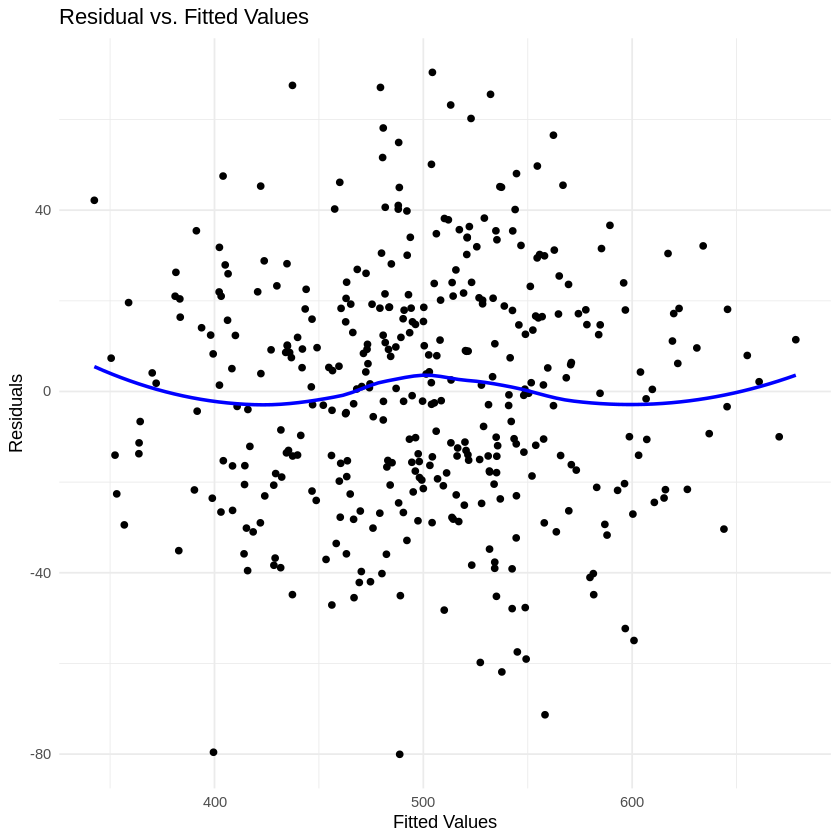

In [ ]:
# Cek asumsi dari model terbaik pada data train
residuals_train <- residuals(best_train)
ggplot(data_train, aes(x = fitted(best_train), y = residuals_train)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Residual vs. Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

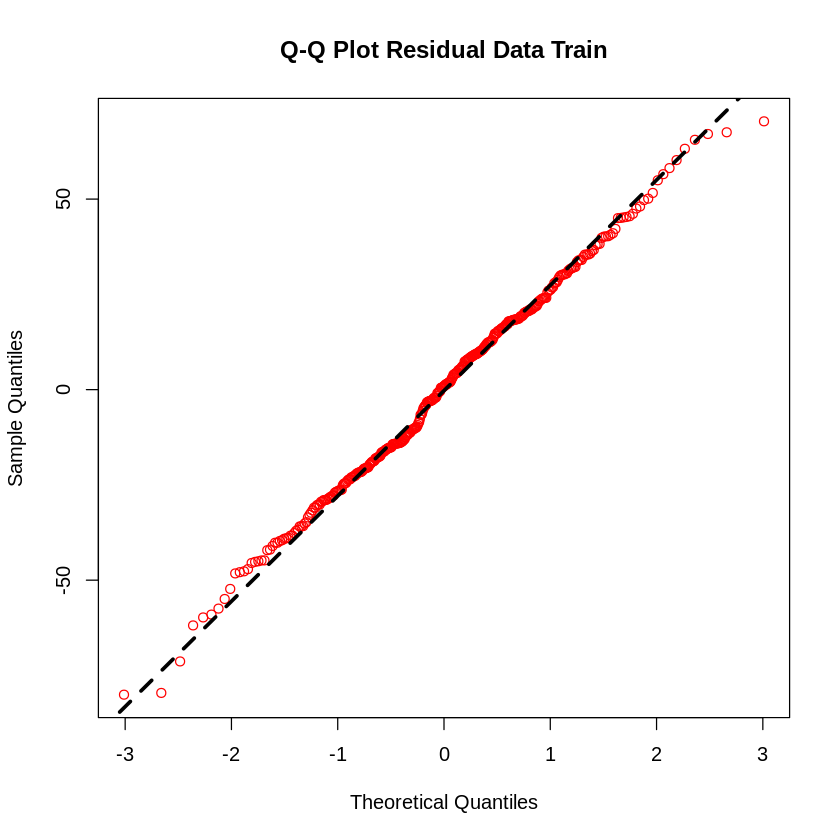

In [ ]:
# Cek apakah model kita sudah bagus untuk digunakan dengan Q-Q Plot
qqnorm(residuals_train, main = "Q-Q Plot Residual Data Train", col = "red")
qqline(residuals_train, col = "black", lty = 2, lwd = 3)

## Cross Validation

Kelompok kami menerapkan persamaan regresi terhadap `data_test` untuk mengukur kinerja model pada data yang tidak terlihat selama pelatihan. Hal ini membantu menilai sejauh mana model dapat melakukan generalisasi pada data baru yang belum pernah dilihat sebelumnya.


Berdasarkan output di bawah, diperoleh bahwa nilai predicted kami berkorelasi cukup bagus dengan nilai aktual Spent di angka sekitar 0.80

Dengan begitu, model kami sudah memenuhi segala uji kelayakan dan siap digunakan

In [ ]:
# Buat model prediksi untuk data test berdasarkan model data train
model_pred <- predict(best_train, newdata = data_test)
data_test$Predicted <- model_pred
head(data_test)

App,Website,Membership,Spent,Predicted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.35196,37.37336,4.434273,549.9041,566.6739
11.36549,37.60779,4.599937,534.7057,538.6408
12.87798,37.44102,1.559152,419.9388,408.3315
13.37856,38.73401,2.245148,436.5156,472.2178
10.86916,35.62244,3.471413,447.6879,451.4999
13.10451,38.87804,2.820097,491.0732,497.1358


In [ ]:
# Cek MSE dari predicted terhadap data test
MSE = mean((model_pred - data_test$Spent)^2)
MSE

[1] 772.9785

In [ ]:
# Cek korelasi antara predicted terhadap data test
actual = data_test$Spent
Predict_val = data_test$Predicted

korelasi = 1 - sum((actual - Predict_val)^2) / sum((actual - mean(actual))^2)
korelasi

[1] 0.818764

`geom_smooth()` using formula = 'y ~ x'


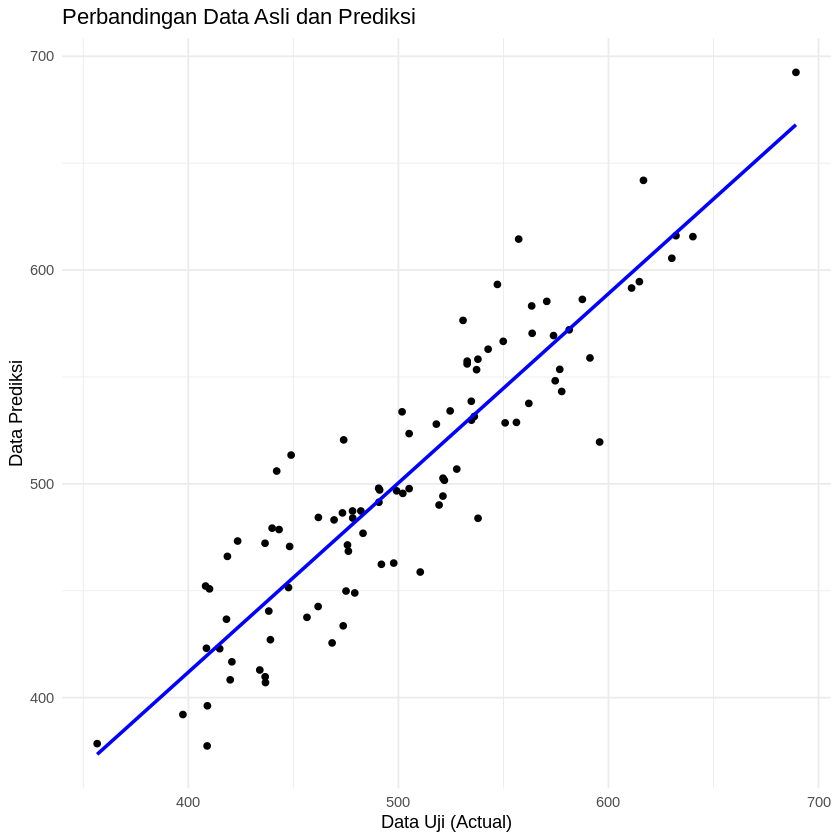

In [ ]:
# Scatter plot antara predicted dengan data test
ggplot(data_test, aes(x = Spent, y = Predicted)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Perbandingan Data Asli dan Prediksi",
       x = "Data Uji (Actual)",
       y = "Data Prediksi") +
  theme_minimal()